<a href="https://colab.research.google.com/github/fatimazain118/SVM-Kernel-and-Stacking-Ensemble/blob/main/Phoenix_K_fold_SVM_Models_%26_Stacking_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
Zain = pd.read_csv("/content/gdrive/MyDrive/Datasets/phoenix data 4.2-4.3.csv")
Zain.shape

(1100, 8)

In [9]:
Zain['Change'] = Zain['Change'].map({'yes': 1, 'no': 0})

In [10]:
Zain.head()

,CBO,NOC,WMC,RFC,SLOC,LCOM,DIT,Change
0,5,0,3,16,44,0,0,1
1,9,0,10,23,309,70,1,1
2,31,1,4,17,154,58,1,1
3,2,0,3,16,15,33,1,0
4,27,0,23,36,544,78,0,1


In [11]:
X = Zain.drop('Change', axis=1)
y = Zain['Change']

In [12]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('sig', SVC(kernel='sigmoid')))
	level0.append(('lin', SVC(kernel='linear')))
	level0.append(('poly', SVC(kernel='poly')))
	level0.append(('rbf', SVC(kernel='rbf')))
	# define meta learner model
	level1 = SVC(kernel='rbf')
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [13]:
def get_models():
	models = dict()
	models['lin'] = SVC(kernel='linear')
	models['sig'] = SVC(kernel='sigmoid')
	models['poly'] = SVC(kernel='poly')
	models['rbf'] = SVC(kernel='rbf')

	models['stacking'] = get_stacking()
	return models

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def evaluate_model(model, X, y):
	kfold_validation=KFold(4)
	scores = cross_val_score(model,X,y,cv=kfold_validation)
	return scores

In [15]:
models = get_models()

In [16]:
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lin 0.616 (0.074)
>sig 0.525 (0.010)
>poly 0.588 (0.077)
>rbf 0.592 (0.076)
>stacking 0.603 (0.088)


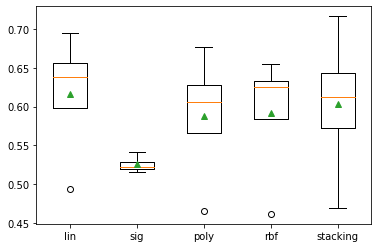

In [17]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()